# Business Report : UFC Fighter Trends and Insights : Marketing / Promotional Focus
In this project, I analyze UFC fight data to gain insights into fighter performance, trends in fighter metrics, and fight outcomes by weight class. 

## Key Business Questions : 

**Which fighters show consistent improvement over time?**
  - This can identify fighters who could be future stars and worth heavily promoting.


**Which weight classes have the most competitive fights?**
  - This can inform descisions on which weight classes to market as having exciting matchups.


**Are there any emerging trends in fighter metrics that could affect the evolution of the sport?**
  - This would be useful for adapting promotional content or strategy.


**Which fight outcomes are most common, and how do they vary by weight class?**
  - Insight into outcome patterns can guide marketing narratives.

## Dataset downloaded from Kaggle: [UFC Complete Dataset 1996-2024](https://www.kaggle.com/datasets/maksbasher/ufc-complete-dataset-all-events-1996-2024/data)

### This dataset contains the following:

    • Fighter stats - The folder contains 2 files, one is .csv cleaned from duplicates and .txt as a source for the fighter stats dataset
    
    • Large set - The folder contains the biggest dataset yet (contains 7439 rows and 94 columns)
    
    • Medium set - The folder contains the medium dataset for basic tasks (contains 7582 rows and 19 columns)
    
    • Small set - The folder contains the small dataset with data about completed and upcoming events with only 683 rows and 3 columns
    
    • Urls - The folder contains all the urls that were parced to get the data from the UFCstats website


---


## Load and display the data

*In this step, we first import the package(s) needed to load the data and conduct initial exploratory analysis. In this case, we need the Python 'pandas' library, and give it the nickname 'pd'.*
*Then we can read the csv files into dataframes using 'pd.read_csv(...)', and assign them meaningful variable names that we will use to access the data later.*

*We also need matplotlib for visializtions later on.*

---


In [4]:
import pandas as pd
import seaborn as sns, matplotlib.pyplot as plt

# load each csv into it's own dataframe
fighter_stats = pd.read_csv('../data/Fighter stats/fighter_stats.csv')

large_set = pd.read_csv('../data/Large set/large_dataset.csv')

medium_set = pd.read_csv('../data/Medium set/medium_dataset.csv')

complete_events = pd.read_csv('../data/Small set/completed_events_small.csv')

upcoming_events = pd.read_csv('../data/Small set/upcoming_events_small.csv')


In [5]:
# view the head of each dataframe and explore the size and  datatypes

print('Fighter Stats: \n', fighter_stats.head())
print('\n' * 2) # line for separation
print('Large Set: \n', large_set.head())
print('\n' * 2) # line for separation
print('Medium Set: \n', medium_set.head())
print('\n' * 2) # line for separation
print('Completed Events: \n', complete_events.head())
print('\n' * 2) # line for separation
print('Upcoming Events: \n', upcoming_events.head())

Fighter Stats: 
                name  wins  losses  height  weight   reach    stance   age  \
0      Amanda Ribas  12.0     5.0  160.02   56.70  167.64  Orthodox  30.0   
1    Rose Namajunas  13.0     6.0  165.10   56.70  165.10  Orthodox  31.0   
2     Karl Williams  10.0     1.0  190.50  106.59  200.66  Orthodox  34.0   
3       Justin Tafa   7.0     4.0  182.88  119.75  187.96  Southpaw  30.0   
4  Edmen Shahbazyan  13.0     4.0  187.96   83.91  190.50  Orthodox  26.0   

   SLpM  sig_str_acc  SApM  str_def  td_avg  td_acc  td_def  sub_avg  
0  4.63         0.40  3.40     0.61    2.07    0.51    0.85      0.7  
1  3.69         0.41  3.51     0.63    1.38    0.47    0.59      0.5  
2  2.87         0.52  1.70     0.60    4.75    0.50    1.00      0.2  
3  4.09         0.54  5.02     0.47    0.00    0.00    0.50      0.0  
4  3.60         0.52  4.09     0.45    2.24    0.38    0.63      0.6  



Large Set: 
                              event_name          r_fighter        b_fighter  \


---

*After looking over the data in all of these files, I will be focusing on the Large Set and Small Set - The Large Set contains fighter metrics as well as event names and outcomes, but does not include the date of the event or location. The Small Set contains event name, date and location for completed events in one file, and upcoming events in another file.*

*By connecting the completed events data from the Small Set with the event and fighter data in the Large Set, I will be able to measure fighter improvements over time.*

---


## Initial exploration of datasets - Large Set, Completed Events

---

 *In this step, I want to understand the types and structure of the data. This is where I check for missing values, duplicate rows, and whether there are inconsistencies in formatting. All of these determine my next steps in cleaning / manipulating the dataframes.*

In [6]:
print('Large Set Data Types: \n', large_set.dtypes)

Large Set Data Types: 
 event_name             object
r_fighter              object
b_fighter              object
winner                 object
weight_class           object
                       ...   
td_acc_total_diff     float64
str_def_total_diff    float64
td_def_total_diff     float64
sub_avg_diff          float64
td_avg_diff           float64
Length: 95, dtype: object


In [7]:
print('Completed Events Data Types: \n', complete_events.dtypes)

Completed Events Data Types: 
 event       object
date        object
location    object
dtype: object


---

*I may need to convert some columns to String - the event name, fighter names, winner and weight class columns for example. For now, I'll continue to explore the data.*

---

*Check for missing values, and duplicate rows*

---

In [8]:
print('Missing values in Large Set: \n', large_set.isnull().sum())

Missing values in Large Set: 
 event_name            0
r_fighter             0
b_fighter             0
winner                0
weight_class          0
                     ..
td_acc_total_diff     0
str_def_total_diff    0
td_def_total_diff     0
sub_avg_diff          0
td_avg_diff           0
Length: 95, dtype: int64


In [9]:
print('Missing values in Completed Events: \n', complete_events.isnull().sum())

Missing values in Completed Events: 
 event       0
date        0
location    0
dtype: int64


In [10]:
#  Check for duplicates 
print('Duplicates found in Large Set: \n', large_set.duplicated().sum())
print('Duplicates found in Completed Events: \n', complete_events.duplicated().sum())

Duplicates found in Large Set: 
 0
Duplicates found in Completed Events: 
 0


---

## Cleaning the data

---

The first thing I want to do here is to combine the completed events date and location data with the large set.

In [11]:
# use pd.merge to combine the completed events date and location data with the large set - using event_name as the common key.

events_fighters = pd.merge(complete_events, large_set, left_on='event', right_on='event_name', how='inner')

# check the new dataframe to ensure the merge is correct: 
print(events_fighters.head())

                                  event            date  \
0  UFC Fight Night: Ribas vs. Namajunas  March 23, 2024   
1  UFC Fight Night: Ribas vs. Namajunas  March 23, 2024   
2  UFC Fight Night: Ribas vs. Namajunas  March 23, 2024   
3  UFC Fight Night: Ribas vs. Namajunas  March 23, 2024   
4  UFC Fight Night: Ribas vs. Namajunas  March 23, 2024   

                 location                            event_name  \
0  Las Vegas, Nevada, USA  UFC Fight Night: Ribas vs. Namajunas   
1  Las Vegas, Nevada, USA  UFC Fight Night: Ribas vs. Namajunas   
2  Las Vegas, Nevada, USA  UFC Fight Night: Ribas vs. Namajunas   
3  Las Vegas, Nevada, USA  UFC Fight Night: Ribas vs. Namajunas   
4  Las Vegas, Nevada, USA  UFC Fight Night: Ribas vs. Namajunas   

           r_fighter        b_fighter winner       weight_class  \
0       Amanda Ribas   Rose Namajunas   Blue  Women's Flyweight   
1      Karl Williams      Justin Tafa    Red        Heavyweight   
2   Edmen Shahbazyan        AJ Dobson    

*Now that the files have been merged, we have 2 columns that contain the same data - 'event' and 'event_name'. So let's drop the 'event' column.*

In [12]:
#  Drop the 'event' column from the merged table - 'event_name' is more clear, and contains the same data. 
events_fighters = events_fighters.drop('event', axis = 1)
print(events_fighters.head())

             date                location  \
0  March 23, 2024  Las Vegas, Nevada, USA   
1  March 23, 2024  Las Vegas, Nevada, USA   
2  March 23, 2024  Las Vegas, Nevada, USA   
3  March 23, 2024  Las Vegas, Nevada, USA   
4  March 23, 2024  Las Vegas, Nevada, USA   

                             event_name          r_fighter        b_fighter  \
0  UFC Fight Night: Ribas vs. Namajunas       Amanda Ribas   Rose Namajunas   
1  UFC Fight Night: Ribas vs. Namajunas      Karl Williams      Justin Tafa   
2  UFC Fight Night: Ribas vs. Namajunas   Edmen Shahbazyan        AJ Dobson   
3  UFC Fight Night: Ribas vs. Namajunas     Payton Talbott  Cameron Saaiman   
4  UFC Fight Night: Ribas vs. Namajunas  Billy Quarantillo    Youssef Zalal   

  winner       weight_class  is_title_bout gender                method  ...  \
0   Blue  Women's Flyweight              0  Women  Decision - Unanimous  ...   
1    Red        Heavyweight              0    Men  Decision - Unanimous  ...   
2    Red      

---

## Business Questions

*In this section, I format and join the data as needed to be able to answer the business questions I have outlined at the start of this project. Each question has it's own section, to be easy to follow along.*

---

1. Which fighters show consistent improvement over time?






2. Which weight classes have the most competitive fights?

3. Are there any emerging trends in fighter metrics that could affect the evolution of the sport?

4. Which fight outcomes are most common, and how do they vary by weight class?

In [13]:
# First step - group the data by method (outcome) and weight_class

outcome_by_weight_class = events_fighters.groupby(['weight_class', 'method']).size().reset_index(name='count')

# Sort by the count to get a quick understanding of the most common outcomes by weight class

outcome_by_weight_class = outcome_by_weight_class.sort_values(by='count', ascending=False)

# View the dataset - check my work
print(outcome_by_weight_class)

                                          weight_class                method  \
41                                         Lightweight  Decision - Unanimous   
207                                       Welterweight  Decision - Unanimous   
208                                       Welterweight                KO/TKO   
42                                         Lightweight                KO/TKO   
49                                        Middleweight                KO/TKO   
..                                                 ...                   ...   
157  Ultimate Fighter 17 Middleweight Tournament Title      Decision - Split   
156  Ultimate Fighter 16 Welterweight Tournament Title  Decision - Unanimous   
155   Ultimate Fighter 15 Lightweight Tournament Title            Submission   
154  Ultimate Fighter 14 Featherweight Tournament T...            Submission   
166  Ultimate Fighter 23 Light Heavyweight Tourname...  Decision - Unanimous   

     count  
41     452  
207    436  


---

*Hm. Looks like the weight class column is not as clean as it appeared to be - Let's dig deeper by grabbing all the unique weight class values:*

In [14]:
print(outcome_by_weight_class['weight_class'].unique())

['Lightweight' 'Welterweight' 'Middleweight' 'Heavyweight' 'Featherweight'
 'Light Heavyweight' 'Bantamweight' "Women's Strawweight" 'Flyweight'
 "Women's Flyweight" "Women's Bantamweight" 'Open Weight' 'Catch Weight'
 'UFC Heavyweight Title' 'UFC Light Heavyweight Title'
 'UFC Middleweight Title' 'UFC Welterweight Title' 'UFC Lightweight Title'
 'UFC Bantamweight Title' 'UFC Featherweight Title'
 "Women's Featherweight" 'UFC Flyweight Title'
 "UFC Women's Bantamweight Title" "UFC Women's Strawweight Title"
 'UFC Interim Heavyweight Title' "UFC Women's Flyweight Title"
 "UFC Women's Featherweight Title" 'UFC Interim Bantamweight Title'
 'UFC Superfight Championship' 'UFC Interim Featherweight Title'
 'UFC Interim Welterweight Title' 'UFC Interim Middleweight Title'
 'Ultimate Fighter Latin America Bantamweight Tournament Title'
 'Ultimate Fighter Latin America 3 Lightweight Tournament Title'
 'Ultimate Fighter Brazil 4 Lightweight Tournament Title'
 'Ultimate Fighter Latin America Feat

*Ok! There's some formatting to fix here, after we ensure that the title fights are marked correctly in another column - there is one already called 'is_title_bout' - so let's cross reference that with all the weight class values that contain 'Title':*

In [15]:
# Find rows where 'Title' appears in weight_class but is_title_bout is 0 (meaning, not marked as a title fight)

unmarked_title_fights = events_fighters[(events_fighters['weight_class'].str.contains('(?i)Title')) & (events_fighters['is_title_bout'] == 0)]
print(unmarked_title_fights.head())

Empty DataFrame
Columns: [date, location, event_name, r_fighter, b_fighter, winner, weight_class, is_title_bout, gender, method, finish_round, total_rounds, time_sec, referee, r_kd, r_sig_str, r_sig_str_att, r_sig_str_acc, r_str, r_str_att, r_str_acc, r_td, r_td_att, r_td_acc, r_sub_att, r_rev, r_ctrl_sec, r_wins_total, r_losses_total, r_age, r_height, r_weight, r_reach, r_stance, r_SLpM_total, r_SApM_total, r_sig_str_acc_total, r_td_acc_total, r_str_def_total, r_td_def_total, r_sub_avg, r_td_avg, b_kd, b_sig_str, b_sig_str_att, b_sig_str_acc, b_str, b_str_att, b_str_acc, b_td, b_td_att, b_td_acc, b_sub_att, b_rev, b_ctrl_sec, b_wins_total, b_losses_total, b_age, b_height, b_weight, b_reach, b_stance, b_SLpM_total, b_SApM_total, b_sig_str_acc_total, b_td_acc_total, b_str_def_total, b_td_def_total, b_sub_avg, b_td_avg, kd_diff, sig_str_diff, sig_str_att_diff, sig_str_acc_diff, str_diff, str_att_diff, str_acc_diff, td_diff, td_att_diff, td_acc_diff, sub_att_diff, rev_diff, ctrl_sec_diff,

*Since the new datframe is empty, it's safe to say that the title fights are marked correctly in the 'is_title_bout' column.*

*Now, let's format the weight_class column:*

In [16]:
# Remove 'UFC ' and ' Title' from weight_class values
events_fighters['weight_class'] = events_fighters['weight_class'].str.replace('UFC ', '').str.replace(' Title', '')

# check my work
print(events_fighters['weight_class'].unique())

["Women's Flyweight" 'Heavyweight' 'Middleweight' 'Bantamweight'
 'Featherweight' 'Lightweight' "Women's Bantamweight" 'Flyweight'
 'Light Heavyweight' "Women's Strawweight" 'Welterweight'
 'Interim Heavyweight' 'Catch Weight' "Women's Featherweight"
 'Interim Featherweight' 'Interim Flyweight' 'Interim Bantamweight'
 'Interim Lightweight' 'Interim Middleweight'
 'Ultimate Fighter 28 Heavyweight Tournament'
 "Ultimate Fighter 28 Women's Featherweight Tournament"
 'Ultimate Fighter 27 Lightweight Tournament'
 'Ultimate Fighter 27 Featherweight Tournament' 'Interim Welterweight'
 'Ultimate Fighter 25 Welterweight Tournament'
 'Ultimate Fighter Latin America 3 Lightweight Tournament'
 'Ultimate Fighter 23 Light Heavyweight Tournament'
 "Ultimate Fighter 23 Women's Strawweight Tournament"
 'Interim Light Heavyweight' 'Ultimate Fighter 22 Lightweight Tournament'
 'Ultimate Fighter Latin America 2 Welterweight Tournament'
 'Ultimate Fighter Latin America 2 Lightweight Tournament'
 'Ultimate 

---

*Now that the weight classes have been cleaned, we can revisit our work earlier - starting with the outcome by weight class variable:*

In [30]:
# Copied this from earlier, now that the weight classes are formatted:
outcome_by_weight_class = events_fighters.groupby(['weight_class', 'method']).size().reset_index(name='count')

# Filter out weight classes that are from tournaments - we only want the offcial UFC weight classes
outcome_by_weight_class = outcome_by_weight_class[~outcome_by_weight_class['weight_class'].str.contains('Tournament|Championship|Interim')]

# Sort by the count to get a quick understanding of the most common outcomes by weight class

outcome_by_weight_class = outcome_by_weight_class.sort_values(by='count', ascending=False)

print(outcome_by_weight_class['weight_class'].unique())

['Lightweight' 'Welterweight' 'Middleweight' 'Heavyweight' 'Featherweight'
 'Light Heavyweight' 'Bantamweight' "Women's Strawweight" 'Flyweight'
 "Women's Flyweight" "Women's Bantamweight" 'Open Weight' 'Catch Weight'
 "Women's Featherweight" 'Super Heavyweight']


*Now that we have our cleaned data, let's try out a visualization using python's seaborn and matplotlib.*

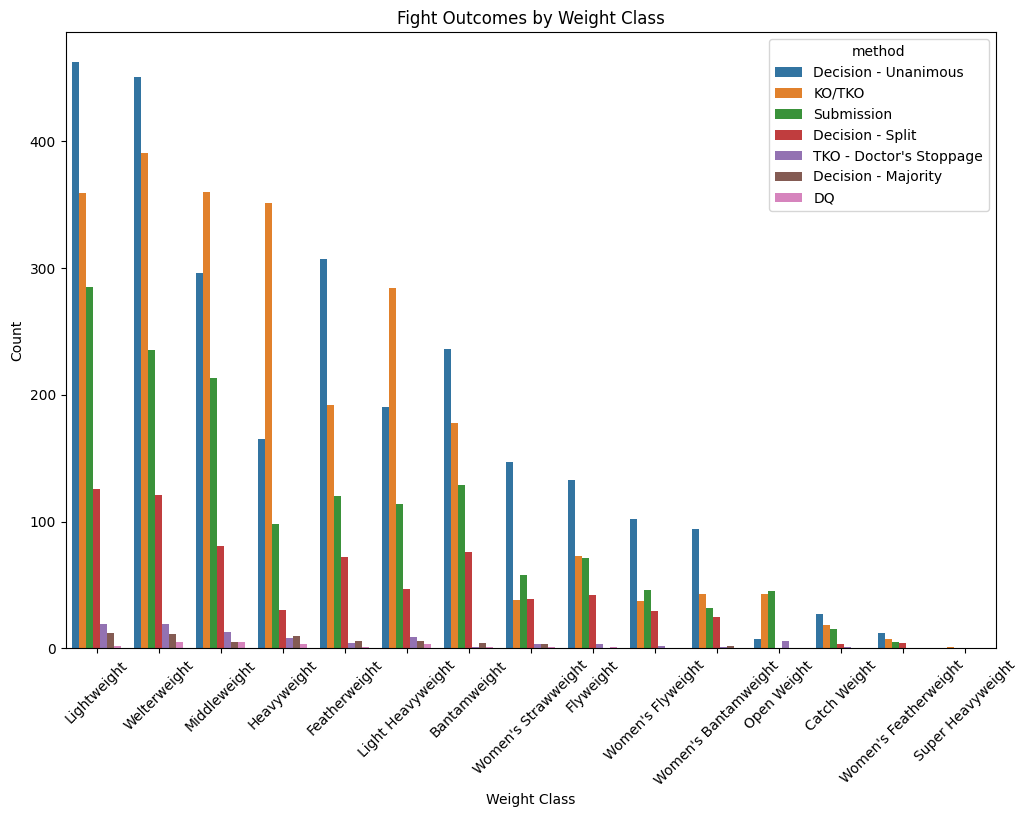

In [32]:
plt.figure(figsize=(12, 8))
sns.barplot(x='weight_class', y='count', hue='method', data=outcome_by_weight_class)
plt.title('Fight Outcomes by Weight Class')
plt.xlabel('Weight Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()